<a href="https://colab.research.google.com/github/amankumar-ds/Amazon-ML-Hackathon-2021/blob/main/ML_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip

--2021-08-01 15:16:34--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.36.50
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.36.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1061576029 (1012M) [binary/octet-stream]
Saving to: ‘dataset52a7b21.zip’

dataset52a7b21.zip  100%[===================>]   1012M  12.8MB/s    in 84s     

2021-08-01 15:17:59 (12.1 MB/s) - ‘dataset52a7b21.zip’ saved [1061576029/1061576029]



In [ ]:
!unzip dataset52a7b21.zip

Archive:  dataset52a7b21.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        
  inflating: dataset/.~lock.train.csv#  


In [ ]:
import numpy as np
import csv
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam#Try all of these
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train = pd.read_csv('/content/dataset/train.csv',escapechar = "\\" , quoting=3)
df_train = df_train.dropna()

In [ ]:
df_train.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
5,Men'S Full Sleeve Raglan T-Shirts Denim T-Shir...,Men'S Full Sleeve Raglan T-Shirts Denim T-Shir...,"[Color: Blue,Sleeve: Full Sleeve,Material: Cot...",Bhavya Enterprise,5
6,Glance Women's Wallet (Black) (LW-21),This Black wallet by Glance will be a treasure...,[The Most Comfortable Women's Wallet That You ...,Glance,6
7,Wild Animals Hungry Brain Educational Flash Ca...,Wild Animals are the animals that mostly stays...,[Playful learning: Flash cards develops the lo...,hungry brain,7


In [ ]:
df_test = pd.read_csv('/content/dataset/test.csv',escapechar = "\\" , quoting=3)

In [ ]:
df_test.head()

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,1,"Command 3M Small Kitchen Hooks, White, Decorat...",Sale Unit: PACK,[INCLUDES - 9 hooks and 12 small indoor strips...,Command
1,2,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...,Synthetic leather palm with double-layer thumb...,[Silicone printing for a better grip. Long las...,O'Neal
2,3,"NFL Detroit Lions Portable Party Fridge, 15.8 ...",Boelter Brands lets you celebrate your favorit...,[Runs on 12 Volt DC Power or 110 Volt AC Power...,Boelter Brands
3,4,Panasonic Single Line KX-TS880MX Corded Phone ...,Features: 50 Station Phonebook Corded Phone Al...,Panasonic Landline Phones doesn't come with a ...,Panasonic
4,5,Zero Baby Girl's 100% Cotton Innerwear Bloomer...,"Zero Baby Girl Panties Set. 100% Cotton, Breat...","[Zero Baby Girl Panties, Pack of 6, 100% Cotto...",Zero


In [ ]:
sample_submission = pd.read_csv('/content/dataset/sample_submission.csv',escapechar = "\\" , quoting=3)

In [ ]:
sample_submission

,PRODUCT_ID,BROWSE_NODE_ID
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4


In [ ]:
x = df_train['TITLE'].astype('str')

In [ ]:
le = LabelEncoder()
y=le.fit_transform(df_train['BROWSE_NODE_ID'])
y=np.expand_dims(y, axis=1)

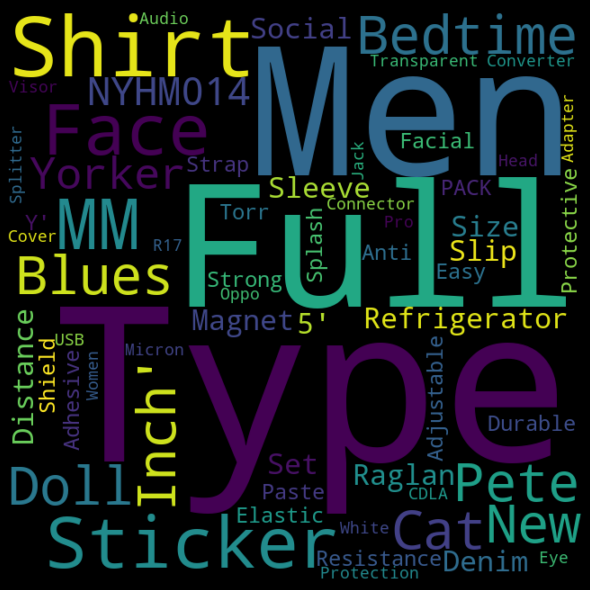

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = x.values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
max_features = 200000
max_text_length = 400

In [ ]:
x_tokenizer =text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
print("Happened")
x_tokenized = x_tokenizer.texts_to_sequences(x)
print("Happened")
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

Happened
Happened


In [ ]:
x_tokenizer.word_index

{'for': 1,
 'with': 2,
 'cover': 3,
 'and': 4,
 'of': 5,
 'black': 6,
 'back': 7,
 'case': 8,
 '2': 9,
 'printed': 10,
 'cotton': 11,
 "women's": 12,
 'set': 13,
 '1': 14,
 'pack': 15,
 'blue': 16,
 'women': 17,
 '3': 18,
 '5': 19,
 'white': 20,
 'x': 21,
 'size': 22,
 'designer': 23,
 '4': 24,
 '6': 25,
 "men's": 26,
 'red': 27,
 'girls': 28,
 'shirt': 29,
 'hard': 30,
 'inch': 31,
 'color': 32,
 'samsung': 33,
 'in': 34,
 't': 35,
 'men': 36,
 'pink': 37,
 'soft': 38,
 'galaxy': 39,
 'large': 40,
 '8': 41,
 'mobile': 42,
 'green': 43,
 'car': 44,
 'home': 45,
 'pro': 46,
 '7': 47,
 'glass': 48,
 'light': 49,
 'design': 50,
 'leather': 51,
 'free': 52,
 '10': 53,
 'fit': 54,
 'kids': 55,
 'brown': 56,
 'full': 57,
 'baby': 58,
 'gold': 59,
 'dress': 60,
 'compatible': 61,
 'multi': 62,
 'wall': 63,
 '12': 64,
 'silver': 65,
 'plus': 66,
 'casual': 67,
 '100': 68,
 'combo': 69,
 'bag': 70,
 'to': 71,
 'grey': 72,
 'yellow': 73,
 'steel': 74,
 'flip': 75,
 'gift': 76,
 'print': 77,
 'pl

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-08-01 15:48:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-08-01 15:48:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-08-01 15:48:37--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
embedding_dim = 300
embedding_index = dict()
f = open('glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embedding_index))

FileNotFoundError: ignored

In [ ]:
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
  if index>max_features -1:
    break
  else:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector
del(embedding_vector)

In [ ]:
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                        embedding_matrix),trainable=False))
model.add(Dropout(0.2))

In [ ]:
filters = 250
kernel_size = 3
hidden_dims = 25000

In [ ]:
no_of_classes=len(train_df['BROWSE_NODE_ID'].unique())
no_of_classes

In [ ]:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid'))
model.add(MaxPooling1D())
model.add(Conv1D(filters,
                 5,
                 padding='valid',
                 activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(no_of_classes,activation='softmax'))

model.summary()

In [ ]:
import tensorflow.keras as keras
opt = Adam(learning_rate=1e-3)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),optimizer=opt,metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
x_train_val

In [ ]:
print("shape of x is:",x_train_val.shape)
print("shape of y is:",y.shape)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val,
                                                  y,
                                                  random_state=1,
                                                  test_size=0.15)

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

,Title,PRODUCT_ID,BROWSE_NODE_ID
0,command 3m small kitchen hooks white decorate ...,1,1140
1,o'neal jump hardware jag unisex-adult glove (b...,2,1045
2,nfl detroit lions portable party fridge 158 quart,3,8269
3,panasonic single line kx-ts880mx corded phone ...,4,125
4,zero baby girl 100% cotton innerwear bloomer d...,5,1922


In [ ]:
l = ["PRODUCT_ID", "BROWSE_NODE_ID"]
df_new = df_new[l]
df_new

,PRODUCT_ID,BROWSE_NODE_ID
0,1,1140
1,2,1045
2,3,8269
3,4,125
4,5,1922
...,...,...
110770,110771,4368
110771,110772,1551
110772,110773,800
110773,110774,800


In [ ]:
df_new.to_csv('/content/dataset/sample_submission.csv', index = False, header = True)

In [ ]:
sample_submission.head()

,PRODUCT_ID,BROWSE_NODE_ID
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
